### <span style="color:#900C3F"><center>$ML$ $For$ $Bioinformatics$</center></span><span style="color:#C70039"><center>$Assignment$ $\#1$</center></span><span style="color:#FF5733"><center>$Question$ $\#7$</center></span><span style="color:#FFC300 "><center>$Hadis$ $Ahmadian$ $400211524$</center></span>

### $prepering$ $data$
* importing needed libraris
* y(x) in a function that recives x and returns $3+0.4*x+delta$ that delta is a unoformly random distributed value in [-10,10]
* for x in [0,100] we'll calculate corresponding y and save them in X and Y lists
* choose 90% of data as training data and keep the rest for testing. we save them in train_x,train_y,test_x and test_y variables


In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def y(x):
    delta=random.uniform(-10,10)
    return 3+0.4*x+delta

In [4]:
X=[]
Y=[]
for i in range(101):
    X.append(i)
for x in X:
    Y.append(y(x))

In [5]:
train_x=np.random.choice(X, size=90, replace=False)
train_y=[]
for t in train_x:
    train_y.append(Y[t])
train_x=list(train_x)

In [6]:
test_x=[]
test_y=[]
for i in range(101):
    if i not in(train_x):
        test_x.append(i)
for t in test_x:
    test_y.append(Y[t])


### $linear$ $regression$
* knowing that $W^{*}=(X^TX)^{-1}X^Tt$ by constructing X and t matrix from training data, and doing the calculations, we will have $W^*$ matrix and therfore $w_0$ and $w_1$

In [12]:
X_matrix=[]
for x in train_x:
    X_matrix.append([1,x])
X_matrix_t=[[1 for _ in range(len(train_x))],train_x]
a = np.array(X_matrix)
b = np.array(X_matrix_t)
e=np.array(train_y)
c=np.matmul(b, a)
c=np.linalg.inv(c)
d=np.matmul(c, b)
d=np.matmul(d, e)
print("[w0 ,","w1] =")
print(d)


[w0 , w1] =
[2.96358331 0.40781028]


**error** : function to calculate error of model on train data
* predicted value and true value for each test data and the final SSE error ($\frac{1}{2}\sum_{i=1}^n(y_i - w_0+W_1*x_i)^2$) is reported

In [28]:
def error(w0,w1,X_t,Y_t):
    s=0
    for i in range(len(X_t)):
        s+=(((Y_t[i])-(w0+w1*X_t[i]))**2)
        print((Y_t[i]),(w0+w1*X_t[i]))
    print("ERROR:",(0.5)*s)

In [50]:
def error_noPrint(w0,w1,X_t,Y_t):
    s=0
    for i in range(len(X_t)):
        s+=(((Y_t[i])-(w0+w1*X_t[i]))**2)
    return (0.5)*s

In [29]:
w0=d[0]
w1=d[1]
print("True value         Predicted value")
error(w0,w1,test_x,test_y)

True value         Predicted value
12.526535023973882 5.818255262646792
-2.0813986414954524 7.857306657761599
15.93266723784173 8.265116936784562
10.709372996895981 10.711978610922332
23.238582276459262 14.382271122128985
17.74212245686465 26.208769213794874
27.664567611896427 26.616579492817834
24.267295373888828 33.95716451523114
27.2328801969761 34.3649747942541
38.74941446907105 35.99621591034595
40.032102724504746 40.889939258621496
ERROR: 253.43158580037527


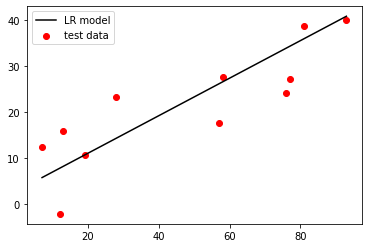

In [30]:
w00=w0
w11=w1
plt.scatter(test_x,test_y,color="red",label="test data")
plt.plot(test_x,[w00+w11*x for x in test_x],color="black",label="LR model")
plt.legend()
plt.show()

### $linear$ $regression$
**steps**: returning the Gradiant of model in a certain state

In [32]:
def steps(x,y,w0,w1,r):
    s0=0
    s1=0
    for i in range(len(x)):
        s0+=((y[i]-(w0+w1*x[i]))*r)
        s1+=(x[i]*(y[i]-(w0+w1*x[i]))*r)
    return (s0/len(x),s1/len(x))

* setting some varibles, w0 and w1 initialized to 0.5, learning rate is 0.0001 and batch_size is considerd 5, the algorithm is going to run for 1000 time
* running SGD for 1000 times results in refining w0 and w1 in each step with respect to the gradiant
* final values of w0 and w1 are reported

In [33]:
w0=0.5
w1=0.5
r=0.0001
step=1000
b_size=5
for i in range(step):
    b=np.random.choice(train_x, size=b_size, replace=False)
    y_b=[Y[b[i]] for i in range(len(b))]
    new_W=steps(b,y_b,w0,w1,r)
    w0+=new_W[0]
    w1+=new_W[1]
print(w0,w1)


0.5641393201270186 0.4318244232044296


* predicted value and true value for each test data and the final SSE error ($\frac{1}{2}\sum_{i=1}^n(y_i - w_0+W_1*x_i)^2$) is reported

In [34]:
print("True value         Predicted value")
error(w0,w1,test_x,test_y)

True value         Predicted value
12.526535023973882 3.586910282558026
-2.0813986414954524 5.746032398580175
15.93266723784173 6.177856821784603
10.709372996895981 8.768803361011182
23.238582276459262 12.655223169851048
17.74212245686465 25.178131442779506
27.664567611896427 25.609955865983935
24.267295373888828 33.38279548366367
27.2328801969761 33.814619906868096
38.74941446907105 35.54191759968582
40.032102724504746 40.723810678138975
ERROR: 274.4044944670975


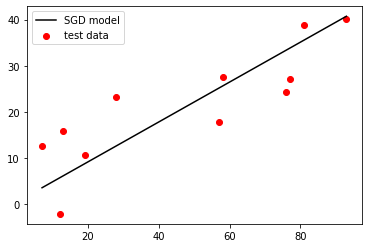

In [35]:
plt.scatter(test_x,test_y,color="red", label="test data")
plt.plot(test_x,[w0+w1*x for x in test_x],color="black",label="SGD model")
plt.legend()
plt.show()

### $k-fold$ $and$ $l^2$ $regularisation$
**steps_regular**: returning the Gradiant of model(with L2 reguliser) in a certain state

In [51]:
def steps_regular(x,y,w0,w1,r,l):
    s0=0
    s1=0
    s0+=((y-(w0+w1*x)+l*w0)*r)
    s1+=((x*(y-(w0+w1*x))+l*w1)*r)
    return (s0,s1)

**regular_train**: training the model(with L2 reguliser) using
* initial weights=0.5
* learning rate=0.0001
* number of steps=1000
* batch size = 1
* returns the weights and SSE error


In [52]:
def regular_train(t_x,Y,valid_x,valid_y,l):
    w0=0.5
    w1=0.5
    r=0.0001
    step=1000
    for i in range(step):
        b=np.random.choice(t_x, size=1, replace=False)
        y_b=[Y[b[i]] for i in range(len(b))]
        new_W=steps_regular(b[0],y_b[0],w0,w1,r,l)
        w0+=new_W[0]
        w1+=new_W[1]
    return error_noPrint(w0,w1,valid_x,valid_y),w0,w1

**k_cross_error**: splits training data in 5 parts, in each round uses one of them as vaidation data and returns the average error and weight of all 5 runs.

In [53]:
def k_cross_error(x,Y,l):
    random.shuffle(x)
    y=[]
    t_x=[]
    t_y=[]
    E=0
    W0=0
    W1=0
    for d in x:
        y.append(Y[d])
    
    for i in range(5):
        valid_x=x[int(i*(len(x)/5)):int((i+1)*(len(x)/5))]
        valid_y=y[int(i*(len(y)/5)):int((i+1)*(len(y)/5))]
        for i in range(len(x)):
            if x[i] not in valid_x:
                t_x.append(x[i])
                t_y.append(y[i])
        (e,w0,w1)=regular_train(t_x,Y,valid_x,valid_y,l)
        W0+=w0
        W1+=w1
        E+=e
    return E/5,(W0/5,W1/5)
            

running 5-cross fold on training data for diffrent values of $\lambda$ to find out the best(less in error)

In [60]:
L=[10**-4,10**-3,10**-2,10**-1,1,10]
error_each=[]
for l in L:
    tmp= k_cross_error(train_x[:],Y,l)
    error_each.append(tmp[0])
    print(l,":" , tmp)

0.0001 : (336.8796425899492, (0.554066279953563, 0.4791496200736686))
0.001 : (308.64671896109274, (0.570319364341158, 0.42803454618431547))
0.01 : (274.3473447066464, (0.5573474175215176, 0.4647670608659228))
0.1 : (314.68618227922167, (0.5624028341128491, 0.44571471470684354))
1 : (324.80180155204033, (0.6042245231758063, 0.43538453034110347))
10 : (335.64829623094204, (1.422526332323051, 0.419337770191035))


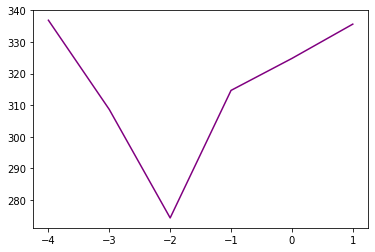

In [61]:
plt.plot([-4,-3,-2,-1,0,1],error_each,color="purple")
plt.show()

* error is high when $\lambda$ is too small $\implies$ overfitting
* error is high when $\lambda$ is too big $\implies$ underfittin
* optimal value for $\lambda$ is $10^{-2}$ $\implies$ w0 , w1 = 0.5573474175215176, 0.4647670608659228

In [63]:
print("True value         Predicted value")
error(0.5573474175215176, 0.4647670608659228,test_x,test_y)

True value         Predicted value
12.526535023973882 3.810716843582977
-2.0813986414954524 6.134552147912592
15.93266723784173 6.599319208778514
10.709372996895981 9.387921573974051
23.238582276459262 13.570825121767356
17.74212245686465 27.049069886879114
27.664567611896427 27.513836947745038
24.267295373888828 35.87964404333165
27.2328801969761 36.344411104197576
38.74941446907105 38.203479347661265
40.032102724504746 43.78068407805234
ERROR: 322.3245081187745


### $linear$ $regression$ $with$ $reguliser$
* knowing that $W^{*}=(X^TX+\lambda I)^{-1}X^Tt$ by constructing X and t matrix from training data, and doing the calculations, we will have $W^*$ matrix and therfore $w_0$ and $w_1$

In [64]:
lbd=np.array([[0.01 ,0],[0,0.01]])
X_matrix=[]
for x in train_x:
    X_matrix.append([1,x])
X_matrix_t=[[1 for _ in range(len(train_x))],train_x]
a = np.array(X_matrix)
b = np.array(X_matrix_t)
e=np.array([Y[x] for x in train_x])
c=np.matmul(b, a)
c=c-lbd
c=np.linalg.inv(c)
d=np.matmul(c, b)
d=np.matmul(d, e)
print("[w0 , w1]")
print(d)

[w0 , w1]
[2.96490572 0.40779055]


In [69]:
print("True value         Predicted value")
error(2.96490572,0.40779055,test_x,test_y)

True value         Predicted value
12.526535023973882 5.81943957
-2.0813986414954524 7.858392319999999
15.93266723784173 8.26618287
10.709372996895981 10.71292617
23.238582276459262 14.383041119999998
17.74212245686465 26.20896707
27.664567611896427 26.616757619999998
24.267295373888828 33.95698752
27.2328801969761 34.36477807
38.74941446907105 35.99594027
40.032102724504746 40.889426869999994
ERROR: 253.41813382161794


### $Comparison$

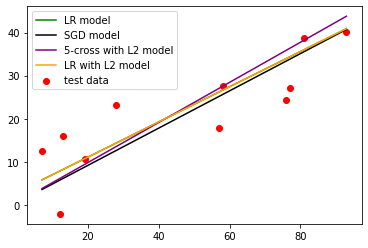

In [70]:
plt.scatter(test_x,test_y,color="red", label="test data")
plt.plot(test_x,[w00+w11*x for x in test_x],color="green",label="LR model")
plt.plot(test_x,[w0+w1*x for x in test_x],color="black",label="SGD model")
plt.plot(test_x,[0.5573474175215176+0.4647670608659228*x for x in test_x],color="purple",label="5-cross with L2 model")
plt.plot(test_x,[2.96490572+0.40779055*x for x in test_x],color="orange",label="LR with L2 model")
plt.legend()
plt.show()